<a href="https://colab.research.google.com/github/hrithikpurwar/ML/blob/main/D_reduction(LDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('/content/Wine.csv',sep=',')

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
df['Customer_Segment'].unique()

array([1, 2, 3])

In [5]:
df.shape

(178, 14)

In [6]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [7]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [8]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1:]

In [9]:
X=pd.DataFrame(X)

In [10]:
Y=pd.DataFrame(Y)

In [11]:
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [12]:
Y

,Customer_Segment
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [14]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(124, 13)
(124, 1)
(54, 13)
(54, 1)


In [15]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, Y_train) #lda is supervised so we also need Y
X_test = lda.transform(X_test) #we dont need Y here as Y is only needed to fit(understanding the structure ) in train

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
X_train

array([[-5.40229808,  0.70296977],
       [ 0.48046269, -3.82977155],
       [ 4.8023778 ,  3.20486993],
       [ 3.38879028,  1.07655973],
       [-0.73649583, -2.04293582],
       [ 3.50897463,  0.66109512],
       [ 5.20012629,  2.41685208],
       [-2.97693178,  1.2892279 ],
       [ 1.89396355, -0.50724787],
       [ 4.03988367, -0.052381  ],
       [-0.90323039, -3.24564666],
       [ 1.74569793, -0.6814442 ],
       [ 3.08955883,  1.49442638],
       [-0.43736756, -1.15605786],
       [-3.85652605,  1.34059793],
       [ 2.27493097, -2.29558394],
       [-1.02813465, -2.20114936],
       [ 2.49369791, -0.8383715 ],
       [-1.57033993,  0.42570767],
       [-5.32795208,  2.17491041],
       [-2.09297638, -2.19932681],
       [-1.64704546, -1.84240448],
       [ 5.45370224,  1.52158551],
       [ 6.10406027,  2.05394761],
       [ 1.34049208, -3.61919805],
       [-1.05569658, -3.07687364],
       [ 0.07795789, -3.4616295 ],
       [ 5.14610453,  2.68148618],
       [ 4.03375521,

In [19]:
X_test

array([[-3.71524   ,  1.39819453],
       [ 5.21222051,  1.70869685],
       [-0.29575465, -3.13982953],
       [-1.88950001,  1.0919558 ],
       [-0.13905206, -1.28287685],
       [-4.8074774 , -2.56430125],
       [-4.7198653 ,  2.91454784],
       [ 5.52167185,  1.00445773],
       [-1.20815085, -2.42213833],
       [ 0.62246005, -2.33036343],
       [ 2.24806074,  1.84699554],
       [ 4.88179337,  1.87710417],
       [-5.0335804 ,  3.18497746],
       [-2.31428424, -2.52585126],
       [ 4.37680117,  2.23201919],
       [-0.47793703, -4.57013038],
       [-3.88671568,  1.76918045],
       [-6.31204744,  3.83110211],
       [ 2.40968089, -1.17591943],
       [-4.91835537,  1.95149009],
       [-2.13305083, -2.76330505],
       [-2.39547038,  1.08398207],
       [-1.56038924,  0.37992184],
       [-1.33864353, -2.31988538],
       [ 1.0906067 , -0.99466835],
       [ 0.43079173, -2.7188764 ],
       [-0.8381249 , -2.74267789],
       [ 0.96604592, -3.20883099],
       [-1.02734533,

In [20]:
from sklearn.svm import SVC
classifier1=SVC(kernel='rbf')
classifier1.fit(X_train,Y_train)
Y_pred1=classifier1.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(Y_test,Y_pred1) #1 incorrect prediction 19+21+13=53 correct prediction
print(cn)

[[19  0  0]
 [ 0 22  0]
 [ 0  0 13]]


In [22]:
 from sklearn.metrics import accuracy_score
 score=accuracy_score(Y_test, Y_pred1)*100
 print('accuracy=',score,'%')

accuracy= 100.0 %


IndexError: ignored

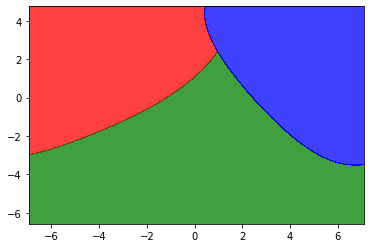

In [25]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set==j,0], X_set[Y_set==j,1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()